In [1]:
import andes
import os
import matplotlib.pyplot as plt
# import matplotlib 
%matplotlib inline
import numpy as np

# Load case

In [2]:
andes.config_logger(stream_level=20)

# case path
dir_path = os.path.abspath('..')
loc_path_case1 = '/plot_fv_gentrip/case123_REGCV1_v7.xlsx'

case = dir_path + loc_path_case1

# load a case
ssa = andes.load(case,
                 setup=True,
                 no_output=True)

# use constant power model for PQ
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0 # turn off under-voltage PQ-to-Z conversion
ssa.PQ.pq2z = 0

Working directory: "/Users/buxinshe/Documents/git-repo/andes/bshe/plot_fv_gentrip"
> Loaded config from file "/Users/buxinshe/.andes/andes.rc"
> Loaded generated Python code in "/Users/buxinshe/.andes/pycode".
Parsing input file "/Users/buxinshe/Documents/git-repo/andes/bshe/plot_fv_gentrip/case123_REGCV1_v7.xlsx"...
Input file parsed in 0.4257 seconds.
System internal structure set up in 0.0212 seconds.


# Modify case

In [3]:
# M and D
M1 = np.array([6, 6, 6, 6, 6, 6, 6, 6])
D1 = np.array([4, 4, 4, 4, 4, 4, 4, 4])

M2 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
D2 = np.array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

M3 = np.array([0.11814667, 0.16732237, 0.68718068, 0.64605445, 0.47454199, 0.51813483, 0.61832465, 0.65060247])
D3 = np.array([0.12208462, 0.10709857, 0.16479399, 0.15698404, 0.17926447, 0.16375611, 0.1636579 , 0.16812373])

M4 = np.array([1.31814667, 1.31732237, 1.93718068, 1.89605445, 1.47454199, 1.76813483, 1.86832465, 1.90060247])
D4 = np.array([0.57208462, 0.15709857, 1.56479399, 1.55698404, 0.67926447, 1.56375611, 1.5636579 , 1.66812373])

#  base
M = M3
D = D3

In [4]:
# reset REGCV1 control parameters
ssa.REGCV1.set(
                src='M', 
                idx= ssa.REGCV1.idx.v,
                attr='v',
                value= M
            )

ssa.REGCV1.set(
                src='D', 
                idx= ssa.REGCV1.idx.v, 
                attr='v',
                value= D
            )

True

In [5]:
# reset power setting point
ssa.PV.set(
                src='p0', 
                idx= ssa.PV.idx.v, 
                attr='v',
                value= np.array([0.175 , 0.315 , 0.07  , 0.084 , 0.049 , 0.042 , 0.063 , 0.0525, 0.056 , 0.0595])
            )

True

In [6]:
ssa.PFlow.run()

ssa.TDS.init()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0034 seconds.
0: |F(x)| = 0.65
1: |F(x)| = 0.003876638309
2: |F(x)| = 1.566892639e-05
3: |F(x)| = 8.199951829e-11
Converged in 4 iterations in 0.0046 seconds.
Initialization for dynamics completed in 0.0297 seconds.
Initialization was successful.


array([ 4.04127129e-01,  7.31904728e-01,  6.97650719e-01,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  9.62883616e-01,  8.13940862e-01,
        8.49616903e-01,  2.95705413e-01,  5.78208861e-01,  5.36456595e-01,
        9.29359915e-01,  7.27685398e-01,  7.71983856e-01,  3.78676589e-01,
        6.94713632e-01,  6.44548595e-01,  1.75612667e-01,  3.17059460e-01,
        2.94043980e-01,  1.75612667e-01,  3.17059460e-01,  2.94043980e-01,
        1.10078008e+00,  1.18261341e+00,  1.18143557e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  2.09444245e-02, -3.83355257e-03,
       -2.33947638e-03,  2.11538687e-01, -3.87188810e-02, -2.36287114e-02,
        1.10078008e+00,  1.18261341e+00,  1.18143557e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.75612667e-01,  3.17059460e-01,
        2.94043980e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.75612667e-01,  3.17059460e-01,  2.94043980e-01,  1.75612667e-01,
        3.17059460e-01,  

In [7]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

# Simulation time
ssa.TDS.config.tf = 5

ssa.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-5 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Simulation to t=5.00 sec completed in 0.1230 seconds.


<Toggle Toggler_1>: GENROU.GENROU_2 status changed to 0 at t=5.0 sec.


True

In [8]:
# Turn off stability check in TDS
ssa.TDS.config.criteria = 0

# Turn off simulation progress bar
ssa.TDS.config.no_tqdm = 1

# Simulation time
ssa.TDS.config.tf = 50

ssa.TDS.run()

Time step reduced to zero. Convergence is not likely.
Simulation terminated at t=9.4579 s.
Simulation to t=50.00 sec completed in 4.2044 seconds.


False

# Plot

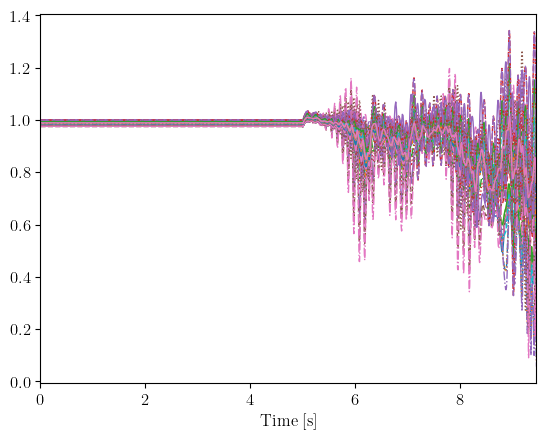

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [9]:
ssa.TDS.plt.plot(
                ssa.Bus.v,
                )

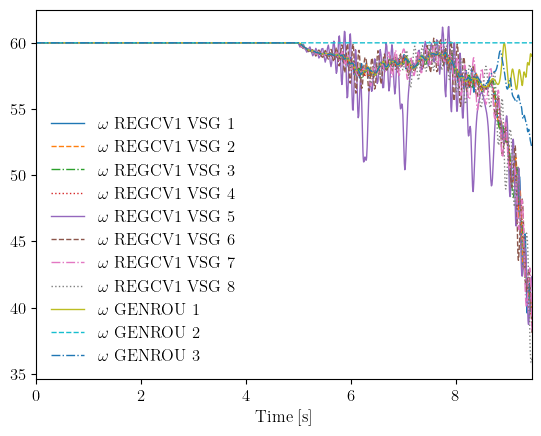

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [10]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.omega, ssa.GENROU.omega],
                ytimes = 60,
                legend = True
                )

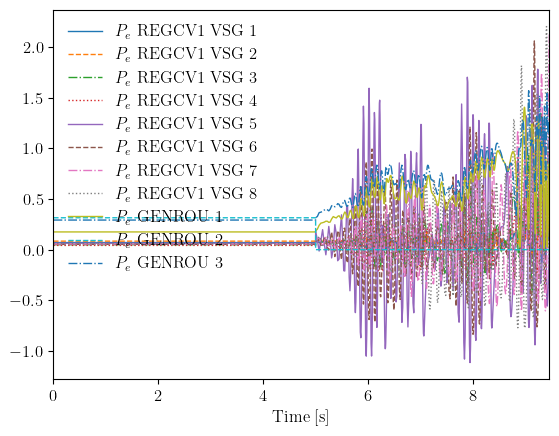

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [11]:
ssa.TDS.plt.plot(
                [ssa.REGCV1.Pe, ssa.GENROU.Pe],
                # left = 0.5,
                # right = 5,
                legend = True
                )

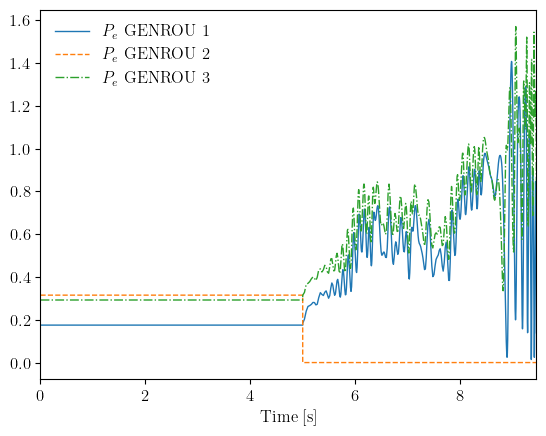

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [12]:
ssa.TDS.plt.plot(
                ssa.GENROU.Pe,
                # left = 0.5,
                # right = 5,
                )

## Extract data

Code clariffication for extracting simulation data after TDS:

ssa.dae.ts.y:  extract **algebra** variable

ssa.dae.ts.x:  extract **state** variable

....a, .a means the idx of the target variable

CHECK https://docs.andes.app/en/latest/groupdoc/SynGen.html#genrou for model reference


In [13]:
# Extract time
t = ssa.dae.ts.t
t = t[:, np.newaxis]

# Extract RoCoF
rocof     = ssa.dae.ts.y[:,  ssa.BusROCOF.Wf_y.a]
rocof_sg  = rocof[:, [0,1,2]]
rocof_ibr = rocof[:, [3,4,5,6,7,8,9,10]]
rocof_max = np.max(np.abs(rocof*60))

# Extract frequency
f         = ssa.dae.ts.y[:,  ssa.REGCV1.omega.a]
fnadir    = np.min(f)*60 - 60

# Extract voltage
busV      = ssa.dae.ts.y[:,  ssa.Bus.v.a]
busV_min  = np.min(busV)

# Extract power angle
theta           = ssa.dae.ts.y[:, ssa.GENROU.a.a]
delta_theta     = np.max(theta, axis=1) - np.min(theta, axis=1)
delta_theta_max = np.max(delta_theta)

In [14]:
# np.savetxt('t_I.csv', t, delimiter=',')
# np.savetxt('rocof_I.csv', rocof, delimiter=',')
# np.savetxt('f_I.csv', f, delimiter=',')
# np.savetxt('busV_I.csv', busV, delimiter=',')

# np.savetxt('t_II.csv', t, delimiter=',')
# np.savetxt('rocof_II.csv', rocof, delimiter=',')
# np.savetxt('f_II.csv', f, delimiter=',')
# np.savetxt('busV_II.csv', busV, delimiter=',')

np.savetxt('t_III.csv', t, delimiter=',')
np.savetxt('rocof_III.csv', rocof, delimiter=',')
np.savetxt('f_III.csv', f, delimiter=',')
np.savetxt('busV_III.csv', busV, delimiter=',')

# np.savetxt('t_IV.csv', t, delimiter=',')
# np.savetxt('rocof_IV.csv', rocof, delimiter=',')
# np.savetxt('f_IV.csv', f, delimiter=',')
# np.savetxt('busV_IV.csv', busV, delimiter=',')

## plot RoCoF

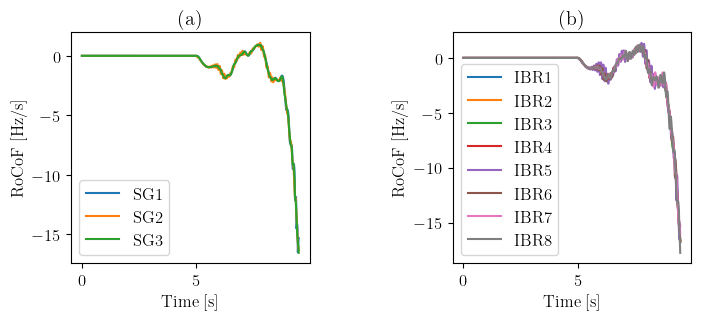

In [15]:
fig = plt.figure(figsize=(8, 3))
plt.subplots_adjust(left=None, bottom=None, right=None,
                    top=None, wspace=0.6, hspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ibr_legend = ['IBR1','IBR2','IBR3','IBR4','IBR5','IBR6','IBR7','IBR8']
sg_legend = ['SG1', 'SG2', 'SG3']

ax1.plot(
            t,
            rocof_sg * 60,
        )
ax1.set_title('(a)')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('RoCoF [Hz/s]')
ax1.legend(sg_legend)
# ax1.set_ylim([0.95, 1.12])
# ax1.set_xlim([0, 3600])

ax2.plot(
            t,
            rocof_ibr * 60,
        )
ax2.set_title('(b)')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('RoCoF [Hz/s]')
ax2.legend(ibr_legend)